In [1]:
import sys
sys.path.append("../../")

In [2]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

plt.style.use('fivethirtyeight')

In [3]:
path = './train.csv'
!ls {path}
df_raw = pd.read_csv(path)

./train.csv


In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
display_all(df_raw.sample(10).T)

,704,1097,90,527,1375,385,1362,8,1173,70
Id,705,1098,91,528,1376,386,1363,9,1174,71
MSSubClass,20,120,20,60,20,120,50,50,50,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL
LotFrontage,70,NaN,60,67,89,43,NaN,51,138,95
LotArea,8400,3696,7200,14948,10991,3182,12513,6120,18030,13651
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,IR1,IR1,Reg,IR1,Reg,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,Lvl,Bnk,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [6]:
df_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_raw.shape

(1460, 81)

In [8]:
df_raw.SalePrice = np.log1p(df_raw.SalePrice)

In [9]:
df_raw['YrsToSell'] = df_raw.YrSold - df_raw.YearBuilt

In [10]:
train_cats(df_raw)

In [11]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [12]:
df,y,nas = proc_df(df_raw, 'SalePrice'); nas

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1980.0}

In [13]:
df.MSSubClass = df.MSSubClass.astype('category')
df.MSSubClass.cat.as_ordered(inplace = True)

df.OverallQual = df.OverallQual.astype('category')
df.OverallQual.cat.as_ordered(inplace = True)

df.GarageCars = df.GarageCars.astype('category')
df.GarageCars.cat.as_ordered(inplace = True)

df.FullBath = df.FullBath.astype('category')
df.FullBath.cat.as_ordered(inplace = True)

df.Neighborhood = df.Neighborhood.astype('category')

In [14]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 500  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((960, 84), (960,), (500, 84), (500,))

In [15]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print("RMSE Train: {}, RMSE Valid:{}, R_2 Train: {}, R_2 Valid:{}".\
              format(res[0],res[1],res[2],res[3]))

**Base Model**

In [16]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=10)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 180 ms, sys: 5.95 ms, total: 186 ms
Wall time: 118 ms
RMSE Train: 0.07080279407885379, RMSE Valid:0.15608554562437743, R_2 Train: 0.9694233180143625, R_2 Valid:0.8382084916136308


In [17]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([11.7753 , 11.82409, 11.75195, 11.61954, 11.51294, 11.82409, 11.73207, 11.91171, 11.79435, 11.73608]),
 11.748210156508875,
 11.665655135642039)

In [18]:
preds.shape

(10, 500)

In [19]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1.46 s, sys: 22 ms, total: 1.49 s
Wall time: 244 ms
RMSE Train: 0.0548911538318648, RMSE Valid:0.14797515095499522, R_2 Train: 0.9816221677455177, R_2 Valid:0.8545854265921663


**Draw Single Tree**

In [20]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 14.1 ms, sys: 2.76 ms, total: 16.8 ms
Wall time: 112 ms
RMSE Train: 0.2099876314670795, RMSE Valid:0.23113852064465484, R_2 Train: 0.7310466281723036, R_2 Valid:0.6452070276253945


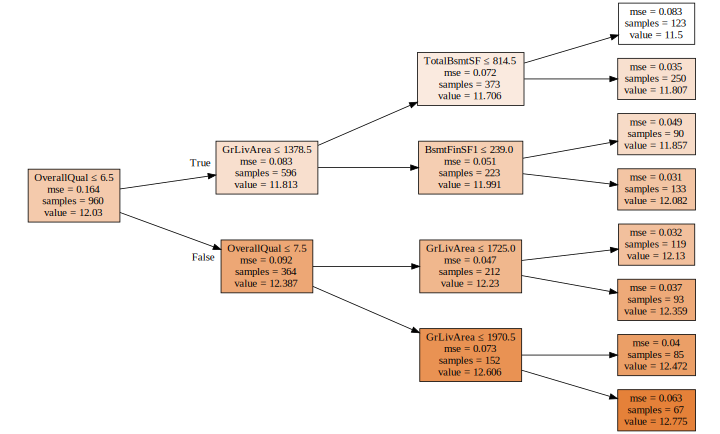

In [21]:
draw_tree(m.estimators_[0], df, precision=3)

**Intro to Bagging**

In [22]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=15)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 271 ms, sys: 6.05 ms, total: 277 ms
Wall time: 121 ms
RMSE Train: 0.062792484686158, RMSE Valid:0.15082858389885204, R_2 Train: 0.9759505637710542, R_2 Valid:0.8489232417502132


In [23]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([11.76758, 11.67845, 11.71178, 11.84511, 11.7753 , 11.75588, 11.83502, 11.61278, 11.59911, 11.81673,
        11.87061, 11.60369, 11.75195, 11.67845, 11.57591]),
 11.725222801462424,
 11.665655135642039)

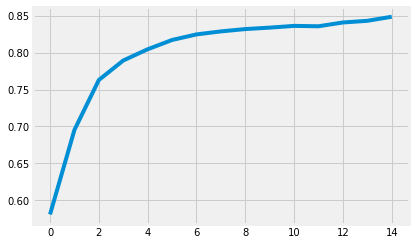

In [24]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(15)]);

**Reducing OverFitting**

In [25]:
set_rf_samples(100)

In [26]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=200, min_samples_leaf=1, max_features = 0.5)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 376 ms, sys: 119 ms, total: 496 ms
Wall time: 327 ms
RMSE Train: 0.14580200010924438, RMSE Valid:0.16099020565722996, R_2 Train: 0.8703368623473056, R_2 Valid:0.8278808231007453


In [27]:
m = ExtraTreesRegressor(n_jobs=-1, n_estimators=200, min_samples_leaf=3)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1.46 s, sys: 84.8 ms, total: 1.55 s
Wall time: 385 ms
RMSE Train: 0.04859496727554522, RMSE Valid:0.14008086534232603, R_2 Train: 0.9855963635447088, R_2 Valid:0.8696869282774925


In [28]:
reset_rf_samples()

In [29]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

**Feature Importance**

In [30]:
# set_rf_samples(100); 

In [31]:
fi = rf_feat_importance(m, df); fi[:20]

,cols,imp
17,OverallQual,0.217476
46,GrLivArea,0.098163
27,ExterQual,0.072540
61,GarageCars,0.069295
80,YrsToSell,0.062587
49,FullBath,0.058597
19,YearBuilt,0.057554
53,KitchenQual,0.037824
57,FireplaceQu,0.027475
56,Fireplaces,0.025808


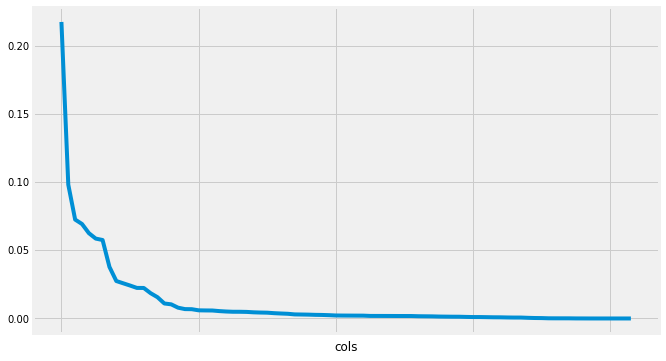

In [32]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [33]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False, color='#1f77b4')

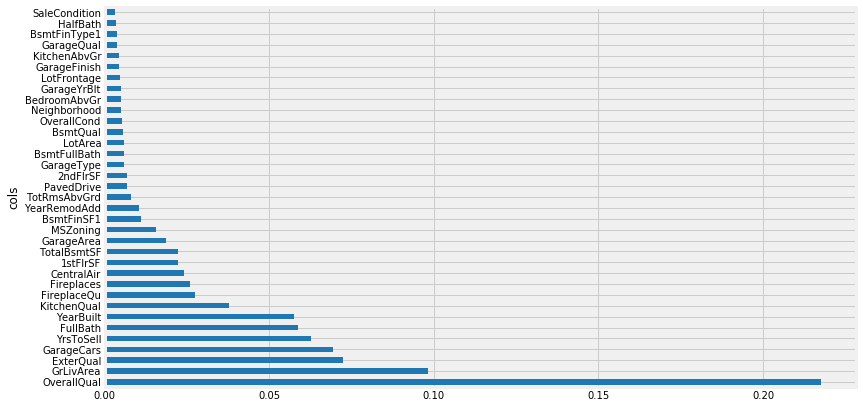

In [34]:
plot_fi(fi[:35]);

In [35]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

25

In [36]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [37]:
df_keep.columns

Index(['OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars', 'YrsToSell',
       'FullBath', 'YearBuilt', 'KitchenQual', 'FireplaceQu', 'Fireplaces',
       'CentralAir', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'MSZoning',
       'BsmtFinSF1', 'YearRemodAdd', 'TotRmsAbvGrd', 'PavedDrive', '2ndFlrSF',
       'GarageType', 'BsmtFullBath', 'LotArea', 'BsmtQual', 'OverallCond'],
      dtype='object')

In [38]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=80, min_samples_leaf=3, max_features = 0.5)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 264 ms, sys: 47.6 ms, total: 312 ms
Wall time: 155 ms
RMSE Train: 0.08600982393095594, RMSE Valid:0.14189672663043926, R_2 Train: 0.9548782764276549, R_2 Valid:0.8662865469884591


In [39]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=80, min_samples_leaf=3, max_features = 0.5)
%time m.fit(df_keep, y)

CPU times: user 410 ms, sys: 45.5 ms, total: 456 ms
Wall time: 158 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

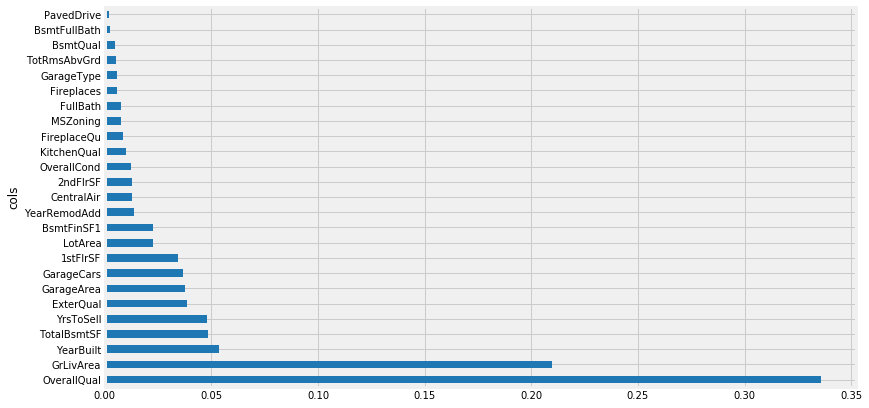

In [40]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [41]:
df,y,nas = proc_df(df_raw, 'SalePrice', max_n_cat=10)
n_valid = 500  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

In [42]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=80, min_samples_leaf=3, max_features = 0.5)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 266 ms, sys: 46.7 ms, total: 312 ms
Wall time: 149 ms
RMSE Train: 0.08540097352015827, RMSE Valid:0.14197138564485332, R_2 Train: 0.9555148349576083, R_2 Valid:0.8661458032079653


**Check for Improvement**

In [43]:
reset_rf_samples()

In [44]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=80, min_samples_leaf=3, max_features = 0.5)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 276 ms, sys: 48.9 ms, total: 325 ms
Wall time: 151 ms
RMSE Train: 0.08642109679882534, RMSE Valid:0.13895717792047502, R_2 Train: 0.9544457279676903, R_2 Valid:0.8717692090434693


**Make Predictions**

In [45]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [46]:
df.shape

(1460, 84)

In [47]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=80, min_samples_leaf=3, max_features = 0.5)
%time m.fit(df, y)

CPU times: user 852 ms, sys: 25.6 ms, total: 877 ms
Wall time: 264 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [48]:
m = ExtraTreesRegressor(n_jobs=-1, n_estimators=200, min_samples_leaf=3)
%time m.fit(df, y)

CPU times: user 2.26 s, sys: 46.5 ms, total: 2.31 s
Wall time: 491 ms


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=3, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
df_test = pd.read_csv('./test.csv')
train_cats(df_test)

In [50]:
df_test,y,nas = proc_df(df_test, na_dict=nas)

In [51]:
df_test.MSSubClass = df_test.MSSubClass.astype('category')
df_test.MSSubClass.cat.as_ordered(inplace = True)

df_test.OverallQual = df_test.OverallQual.astype('category')
df_test.OverallQual.cat.as_ordered(inplace = True)

df_test.GarageCars = df_test.GarageCars.astype('category')
df_test.GarageCars.cat.as_ordered(inplace = True)

df_test.FullBath = df_test.FullBath.astype('category')
df_test.FullBath.cat.as_ordered(inplace = True)

In [52]:
df_test['YrsToSell'] = df_test.YrSold - df_test.YearBuilt

In [53]:
preds = m.predict(df_test)

In [54]:
preds = np.exp(preds); preds

array([117561.65525, 146208.5594 , 172050.85855, ..., 149785.78899, 109093.86869, 226646.98402])

In [55]:
subm = pd.DataFrame(list(zip(df_test.Id, preds)))
subm.columns = ['Id', 'SalePrice']
subm.to_csv('submission.csv', index = False)